In [1]:
import numpy as np
from scipy.sparse import csr_matrix

In [2]:
val_X = np.zeros((3000, 10000), dtype=float)
with open('valdat.txt') as fp:
    for line in fp:
        vals = line.split()
        val_X[(int(vals[1])-1), (int(vals[0])-1)] = float(vals[2])

In [3]:
val_y = np.zeros((10000, 1))
i = 0
with open('vallables.txt') as fp:
    for line in fp:
        vals = line.split()
        val_y[i, 0] = int(vals[0])
        i += 1

In [4]:
X = np.zeros((3000, 10000))
with open('traindata.txt') as fp1:
    for line in fp1:
        vals = line.split()
        X[(int(vals[1])-1), (int(vals[0])-1)] = float(vals[2])
        

In [5]:
y = np.zeros((10000, 1))
i = 0
with open('trainlables.txt') as fp:
    for line in fp:
        vals = line.split()
        y[i, 0] = int(vals[0])
        i += 1

In [6]:
y

array([[91.],
       [85.],
       [86.],
       ...,
       [89.],
       [89.],
       [85.]])

In [7]:
N = 10000
d = 3000

In [8]:
#Calculate ak in A
A = np.zeros((d, 1))
T = np.matmul(X, X.T)
for i in range(d):
    A[i, 0] = 2*T[i,i]

In [12]:
def objective(w, r, lambd, d):
    sum_w = 0
    for i in range(d):
        sum_w += abs(w[i,0])
    return np.dot(r,r.T) + lambd*sum_w


In [13]:
def rms(r, N):    
    return np.dot(r,r.T)/N

In [14]:
def get_rms_val(w, b, val_X, val_y):    
    r = np.matmul(w.T, val_X) + b - val_y.T
    return np.dot(r,r.T)/N

In [15]:
def initLambda(X, Y, N):
    YNorm = Y - float(Y.sum())/N
    Z = abs(np.matmul(X,YNorm))
    re =  2 * (Z.max())
    print (re)
    return re

In [114]:
lamba = initLambda(X, y, N)

delta = 0.01
lambas = []
rms_train = []
rms_val = []
lambas = []
w_non_zeros = []
w_vecs = []
b_vecs = []
b = np.zeros((1,N))
w = np.ones((d,1))
c = np.zeros((d,1))

for i in range(20):
    print("iteration: ", i+1)
    print("Lambda is :", lamba)
    
    converged = False
    previous = 0 
    i = 0
    while(not converged):
        R = y.T - np.matmul(w.T, X) - b
        b_new = np.asaaray([(R + b).sum()/N]*N)
        R = R + b - b_new
        b = b_new
        w_new = np.zeros((d,1))
        for k in range(d):
            c[k,0] = 2*np.dot(R + w[k,0]*X[k], X[k])
            if(c[k,0] < -1*lamba):
                w_new[k,0] = (c[k,0] + lamba)/A[k,0]
            elif(c[k,0] > lamba):
                w_new[k,0] = (c[k,0] - lamba)/A[k,0]
            else:
                w_new[k,0] = 0
            R = R + w[k,0]*X[k] - w_new[k,0]*X[k]
        w = w_new
        print("previous", previous)
        print("Objective function value: ", i, " ", objective(w, R, lamba, d))
        i += 1
        newObjective = objective(w, R, lamba, d)
        if (abs(newObjective[0,0] - previous)) < delta:
            break
        else:
            previous = newObjective[0,0]

    rms_train.append(rms(R,N))
    rms_val.append(get_rms_val(w, b, val_X, val_y))
    w_vecs.append(w)
    b_vecs.append(b)
    lambas.append(lamba)
    w_non_zeros.append(np.count_nonzero(w))
    lamba/=2
    


    

1271.8696510000054
('iteration: ', 1)
('Lambda is :', 1271.8696510000054)
('previous', 0)
('Objective function value: ', 0, ' ', array([[230851.28474351]]))
('previous', 230851.28474350512)
('Objective function value: ', 1, ' ', array([[169608.56521983]]))
('previous', 169608.56521983384)
('Objective function value: ', 2, ' ', array([[127424.11821959]]))
('previous', 127424.1182195884)
('Objective function value: ', 3, ' ', array([[116030.5565989]]))
('previous', 116030.55659890463)
('Objective function value: ', 4, ' ', array([[115339.9759]]))
('previous', 115339.97589999968)
('Objective function value: ', 5, ' ', array([[115339.9759]]))
('iteration: ', 2)
('Lambda is :', 635.9348255000027)
('previous', 0)
('Objective function value: ', 0, ' ', array([[113464.97051963]]))
('previous', 113464.97051962593)
('Objective function value: ', 1, ' ', array([[113351.72481509]]))
('previous', 113351.72481509447)
('Objective function value: ', 2, ' ', array([[113268.05422605]]))
('previous', 113

('previous', 68212.45709164764)
('Objective function value: ', 4, ' ', array([[68190.29475239]]))
('previous', 68190.29475239254)
('Objective function value: ', 5, ' ', array([[68169.544532]]))
('previous', 68169.54453199927)
('Objective function value: ', 6, ' ', array([[68150.29228064]]))
('previous', 68150.2922806439)
('Objective function value: ', 7, ' ', array([[68132.32233463]]))
('previous', 68132.32233463334)
('Objective function value: ', 8, ' ', array([[68115.40618938]]))
('previous', 68115.40618938347)
('Objective function value: ', 9, ' ', array([[68099.40679618]]))
('previous', 68099.40679617946)
('Objective function value: ', 10, ' ', array([[68084.7264801]]))
('previous', 68084.72648009632)
('Objective function value: ', 11, ' ', array([[68071.79725641]]))
('previous', 68071.79725641021)
('Objective function value: ', 12, ' ', array([[68060.82953921]]))
('previous', 68060.82953921224)
('Objective function value: ', 13, ' ', array([[68051.80817632]]))
('previous', 68051.8

('previous', 57310.74806685173)
('Objective function value: ', 36, ' ', array([[57310.33029385]]))
('previous', 57310.33029384591)
('Objective function value: ', 37, ' ', array([[57309.96436038]]))
('previous', 57309.96436037842)
('Objective function value: ', 38, ' ', array([[57309.64413788]]))
('previous', 57309.64413787877)
('Objective function value: ', 39, ' ', array([[57309.36411582]]))
('previous', 57309.36411582141)
('Objective function value: ', 40, ' ', array([[57309.1193282]]))
('previous', 57309.119328198714)
('Objective function value: ', 41, ' ', array([[57308.90530278]]))
('previous', 57308.905302780644)
('Objective function value: ', 42, ' ', array([[57308.71809878]]))
('previous', 57308.71809878066)
('Objective function value: ', 43, ' ', array([[57308.55425506]]))
('previous', 57308.55425506147)
('Objective function value: ', 44, ' ', array([[57308.41075086]]))
('previous', 57308.41075086027)
('Objective function value: ', 45, ' ', array([[57308.28496189]]))
('previou

('previous', 47802.18746654636)
('Objective function value: ', 52, ' ', array([[47801.90319779]]))
('previous', 47801.903197788815)
('Objective function value: ', 53, ' ', array([[47801.6425313]]))
('previous', 47801.64253129541)
('Objective function value: ', 54, ' ', array([[47801.40353244]]))
('previous', 47801.403532437675)
('Objective function value: ', 55, ' ', array([[47801.18442042]]))
('previous', 47801.18442041527)
('Objective function value: ', 56, ' ', array([[47800.98364175]]))
('previous', 47800.98364175121)
('Objective function value: ', 57, ' ', array([[47800.79975541]]))
('previous', 47800.79975541213)
('Objective function value: ', 58, ' ', array([[47800.63141058]]))
('previous', 47800.63141058414)
('Objective function value: ', 59, ' ', array([[47800.47734827]]))
('previous', 47800.477348267195)
('Objective function value: ', 60, ' ', array([[47800.3364054]]))
('previous', 47800.336405401235)
('Objective function value: ', 61, ' ', array([[47800.2074739]]))
('previou

('previous', 39668.76190007567)
('Objective function value: ', 44, ' ', array([[39667.88509259]]))
('previous', 39667.885092585995)
('Objective function value: ', 45, ' ', array([[39667.062002]]))
('previous', 39667.06200199969)
('Objective function value: ', 46, ' ', array([[39666.29036699]]))
('previous', 39666.29036698901)
('Objective function value: ', 47, ' ', array([[39665.56893427]]))
('previous', 39665.56893426712)
('Objective function value: ', 48, ' ', array([[39664.89552089]]))
('previous', 39664.89552088584)
('Objective function value: ', 49, ' ', array([[39664.26723001]]))
('previous', 39664.267230013356)
('Objective function value: ', 50, ' ', array([[39663.68109747]]))
('previous', 39663.68109746888)
('Objective function value: ', 51, ' ', array([[39663.1342846]]))
('previous', 39663.13428459694)
('Objective function value: ', 52, ' ', array([[39662.62411587]]))
('previous', 39662.624115866056)
('Objective function value: ', 53, ' ', array([[39662.14815354]]))
('previous

('previous', 33223.39647491054)
('Objective function value: ', 16, ' ', array([[33219.78334707]]))
('previous', 33219.783347066004)
('Objective function value: ', 17, ' ', array([[33216.28447705]]))
('previous', 33216.284477046676)
('Objective function value: ', 18, ' ', array([[33212.91090579]]))
('previous', 33212.91090578634)
('Objective function value: ', 19, ' ', array([[33209.66958912]]))
('previous', 33209.669589119294)
('Objective function value: ', 20, ' ', array([[33206.5651484]]))
('previous', 33206.565148399415)
('Objective function value: ', 21, ' ', array([[33203.60298596]]))
('previous', 33203.60298595726)
('Objective function value: ', 22, ' ', array([[33200.78530672]]))
('previous', 33200.78530672481)
('Objective function value: ', 23, ' ', array([[33198.11161334]]))
('previous', 33198.111613343615)
('Objective function value: ', 24, ' ', array([[33195.58165603]]))
('previous', 33195.581656028065)
('Objective function value: ', 25, ' ', array([[33193.1880918]]))
('prev

('previous', 33150.383979076265)
('Objective function value: ', 99, ' ', array([[33150.32267278]]))
('previous', 33150.32267278196)
('Objective function value: ', 100, ' ', array([[33150.26421033]]))
('previous', 33150.26421033161)
('Objective function value: ', 101, ' ', array([[33150.20833261]]))
('previous', 33150.20833261483)
('Objective function value: ', 102, ' ', array([[33150.1549915]]))
('previous', 33150.154991500414)
('Objective function value: ', 103, ' ', array([[33150.10410738]]))
('previous', 33150.10410738236)
('Objective function value: ', 104, ' ', array([[33150.05558543]]))
('previous', 33150.05558542714)
('Objective function value: ', 105, ' ', array([[33150.00932606]]))
('previous', 33150.009326056985)
('Objective function value: ', 106, ' ', array([[33149.96522966]]))
('previous', 33149.965229662586)
('Objective function value: ', 107, ' ', array([[33149.92319854]]))
('previous', 33149.923198543176)
('Objective function value: ', 108, ' ', array([[33149.88313773]]

('previous', 28381.53336388396)
('Objective function value: ', 43, ' ', array([[28380.88658606]]))
('previous', 28380.886586057146)
('Objective function value: ', 44, ' ', array([[28380.26725593]]))
('previous', 28380.267255933613)
('Objective function value: ', 45, ' ', array([[28379.67399117]]))
('previous', 28379.673991169417)
('Objective function value: ', 46, ' ', array([[28379.10536539]]))
('previous', 28379.105365386054)
('Objective function value: ', 47, ' ', array([[28378.56019236]]))
('previous', 28378.56019235694)
('Objective function value: ', 48, ' ', array([[28378.03738772]]))
('previous', 28378.037387715005)
('Objective function value: ', 49, ' ', array([[28377.53594118]]))
('previous', 28377.53594118043)
('Objective function value: ', 50, ' ', array([[28377.05476797]]))
('previous', 28377.054767969556)
('Objective function value: ', 51, ' ', array([[28376.59285538]]))
('previous', 28376.592855382416)
('Objective function value: ', 52, ' ', array([[28376.14928372]]))
('p

('previous', 28365.998019943538)
('Objective function value: ', 126, ' ', array([[28365.97584905]]))
('previous', 28365.975849050352)
('Objective function value: ', 127, ' ', array([[28365.95454964]]))
('previous', 28365.95454963961)
('Objective function value: ', 128, ' ', array([[28365.93408733]]))
('previous', 28365.9340873302)
('Objective function value: ', 129, ' ', array([[28365.91442914]]))
('previous', 28365.914429140408)
('Objective function value: ', 130, ' ', array([[28365.89554342]]))
('previous', 28365.89554341887)
('Objective function value: ', 131, ' ', array([[28365.87739978]]))
('previous', 28365.877399784626)
('Objective function value: ', 132, ' ', array([[28365.85996907]]))
('previous', 28365.85996907331)
('Objective function value: ', 133, ' ', array([[28365.84322329]]))
('previous', 28365.843223285687)
('Objective function value: ', 134, ' ', array([[28365.82713554]]))
('previous', 28365.827135537966)
('Objective function value: ', 135, ' ', array([[28365.81168001

('previous', 25250.487426306405)
('Objective function value: ', 61, ' ', array([[25250.32845421]]))
('previous', 25250.32845421243)
('Objective function value: ', 62, ' ', array([[25250.17507163]]))
('previous', 25250.17507163112)
('Objective function value: ', 63, ' ', array([[25250.02709885]]))
('previous', 25250.02709884985)
('Objective function value: ', 64, ' ', array([[25249.88435911]]))
('previous', 25249.884359110256)
('Objective function value: ', 65, ' ', array([[25249.74667852]]))
('previous', 25249.746678524574)
('Objective function value: ', 66, ' ', array([[25249.61388648]]))
('previous', 25249.613886481417)
('Objective function value: ', 67, ' ', array([[25249.48581514]]))
('previous', 25249.485815144602)
('Objective function value: ', 68, ' ', array([[25249.36228343]]))
('previous', 25249.362283431536)
('Objective function value: ', 69, ' ', array([[25249.24312408]]))
('previous', 25249.243124084274)
('Objective function value: ', 70, ' ', array([[25249.12817999]]))
('p

('previous', 23406.811732449503)
('Objective function value: ', 5, ' ', array([[23404.16097089]]))
('previous', 23404.16097088895)
('Objective function value: ', 6, ' ', array([[23402.15038672]]))
('previous', 23402.150386720565)
('Objective function value: ', 7, ' ', array([[23400.56621729]]))
('previous', 23400.566217294534)
('Objective function value: ', 8, ' ', array([[23399.28099891]]))
('previous', 23399.280998912753)
('Objective function value: ', 9, ' ', array([[23398.20908053]]))
('previous', 23398.20908052998)
('Objective function value: ', 10, ' ', array([[23397.29552023]]))
('previous', 23397.295520234322)
('Objective function value: ', 11, ' ', array([[23396.50171159]]))
('previous', 23396.50171159367)
('Objective function value: ', 12, ' ', array([[23395.80037441]]))
('previous', 23395.800374407307)
('Objective function value: ', 13, ' ', array([[23395.17184197]]))
('previous', 23395.171841965825)
('Objective function value: ', 14, ' ', array([[23394.60024722]]))
('previo

('previous', 23383.791727832195)
('Objective function value: ', 89, ' ', array([[23383.76464996]]))
('previous', 23383.764649957804)
('Objective function value: ', 90, ' ', array([[23383.73846721]]))
('previous', 23383.738467211224)
('Objective function value: ', 91, ' ', array([[23383.71315701]]))
('previous', 23383.713157012273)
('Objective function value: ', 92, ' ', array([[23383.68869655]]))
('previous', 23383.688696549725)
('Objective function value: ', 93, ' ', array([[23383.66506215]]))
('previous', 23383.665062145024)
('Objective function value: ', 94, ' ', array([[23383.64223005]]))
('previous', 23383.642230048346)
('Objective function value: ', 95, ' ', array([[23383.62017656]]))
('previous', 23383.62017655584)
('Objective function value: ', 96, ' ', array([[23383.59887779]]))
('previous', 23383.598877787714)
('Objective function value: ', 97, ' ', array([[23383.57830982]]))
('previous', 23383.578309824883)
('Objective function value: ', 98, ' ', array([[23383.55844887]]))
(

('previous', 22341.520984627725)
('Objective function value: ', 53, ' ', array([[22341.46580541]]))
('previous', 22341.465805408334)
('Objective function value: ', 54, ' ', array([[22341.41237767]]))
('previous', 22341.41237766551)
('Objective function value: ', 55, ' ', array([[22341.36063684]]))
('previous', 22341.360636837737)
('Objective function value: ', 56, ' ', array([[22341.31052156]]))
('previous', 22341.31052156209)
('Objective function value: ', 57, ' ', array([[22341.26197451]]))
('previous', 22341.26197451151)
('Objective function value: ', 58, ' ', array([[22341.21494155]]))
('previous', 22341.21494155281)
('Objective function value: ', 59, ' ', array([[22341.16937127]]))
('previous', 22341.169371267486)
('Objective function value: ', 60, ' ', array([[22341.1252147]]))
('previous', 22341.12521470135)
('Objective function value: ', 61, ' ', array([[22341.08242515]]))
('previous', 22341.08242514795)
('Objective function value: ', 62, ' ', array([[22341.04095793]]))
('previ

('previous', 21782.867018971992)
('Objective function value: ', 28, ' ', array([[21782.7819116]]))
('previous', 21782.781911604536)
('Objective function value: ', 29, ' ', array([[21782.70026826]]))
('previous', 21782.70026825798)
('Objective function value: ', 30, ' ', array([[21782.62191466]]))
('previous', 21782.62191466488)
('Objective function value: ', 31, ' ', array([[21782.54668705]]))
('previous', 21782.54668705364)
('Objective function value: ', 32, ' ', array([[21782.47443189]]))
('previous', 21782.47443189482)
('Objective function value: ', 33, ' ', array([[21782.40543366]]))
('previous', 21782.405433656335)
('Objective function value: ', 34, ' ', array([[21782.33937656]]))
('previous', 21782.33937655963)
('Objective function value: ', 35, ' ', array([[21782.27588474]]))
('previous', 21782.275884744915)
('Objective function value: ', 36, ' ', array([[21782.21483326]]))
('previous', 21782.21483326324)
('Objective function value: ', 37, ' ', array([[21782.15610448]]))
('previ

('previous', 21491.59617100419)
('Objective function value: ', 12, ' ', array([[21491.52377575]]))
('previous', 21491.52377574664)
('Objective function value: ', 13, ' ', array([[21491.45552366]]))
('previous', 21491.455523658286)
('Objective function value: ', 14, ' ', array([[21491.39093587]]))
('previous', 21491.390935873045)
('Objective function value: ', 15, ' ', array([[21491.32963203]]))
('previous', 21491.32963203198)
('Objective function value: ', 16, ' ', array([[21491.27129488]]))
('previous', 21491.27129488473)
('Objective function value: ', 17, ' ', array([[21491.21566157]]))
('previous', 21491.21566156557)
('Objective function value: ', 18, ' ', array([[21491.16255018]]))
('previous', 21491.162550182817)
('Objective function value: ', 19, ' ', array([[21491.11181463]]))
('previous', 21491.111814629552)
('Objective function value: ', 20, ' ', array([[21491.0632224]]))
('previous', 21491.063222398938)
('Objective function value: ', 21, ' ', array([[21491.01662792]]))
('prev

('previous', 21341.869545978454)
('Objective function value: ', 21, ' ', array([[21341.84771315]]))
('previous', 21341.847713153213)
('Objective function value: ', 22, ' ', array([[21341.82663819]]))
('previous', 21341.82663819456)
('Objective function value: ', 23, ' ', array([[21341.80628199]]))
('previous', 21341.806281992584)
('Objective function value: ', 24, ' ', array([[21341.78660941]]))
('previous', 21341.78660940792)
('Objective function value: ', 25, ' ', array([[21341.76758829]]))
('previous', 21341.76758829299)
('Objective function value: ', 26, ' ', array([[21341.74918895]]))
('previous', 21341.74918895004)
('Objective function value: ', 27, ' ', array([[21341.73138375]]))
('previous', 21341.731383753286)
('Objective function value: ', 28, ' ', array([[21341.71414684]]))
('previous', 21341.71414683813)
('Objective function value: ', 29, ' ', array([[21341.69745372]]))
('previous', 21341.69745372097)
('Objective function value: ', 30, ' ', array([[21341.68127324]]))
('prev

In [128]:
rms_val

[array([[11.48929457]]),
 array([[10.50437012]]),
 array([[9.008768]]),
 array([[7.75580936]]),
 array([[6.45635023]]),
 array([[5.48806487]]),
 array([[4.76295415]]),
 array([[4.18478494]]),
 array([[3.86794413]]),
 array([[3.79322664]]),
 array([[3.90429826]]),
 array([[4.07619439]]),
 array([[4.22245299]]),
 array([[4.32040225]]),
 array([[4.37813106]]),
 array([[4.41004485]]),
 array([[4.42663023]]),
 array([[4.43507795]]),
 array([[4.43928309]]),
 array([[4.44138261]])]

In [129]:
import heapq
largest = heapq.nlargest(10, range(len(w_vecs[9].T[0])), w_vecs[9].T[0].take)

In [130]:
import heapq
smallest = heapq.nsmallest(10, range(len(w_vecs[9].T[0])), w_vecs[9].T[0].take)

In [131]:
features = []
with open('features.txt') as fp:
    for line in fp:
        features.append(line)

In [132]:
largest_features = []
smallest_features = []
for i in range(10):
    largest_features.append(features[largest[i]])
    smallest_features.append(features[smallest[i]])

In [133]:
largest_features

['spearmint\n',
 'stars\n',
 'big\n',
 'lifesaver\n',
 'ageability\n',
 'lemony\n',
 'sweet black\n',
 'nearly\n',
 'truly\n',
 'acidity provides\n']

In [134]:
smallest_features

['earns\n',
 'high\n',
 'cherry berry\n',
 'soft\n',
 'sparkler\n',
 'liqueur\n',
 'cuts\n',
 'semillon\n',
 'banana\n',
 'brightened\n']

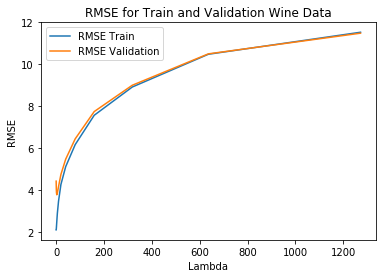

In [126]:
import matplotlib.pyplot as plt
rms_t = []
for i in range(20):
    rms_t.append(rms_train[i][0,0])
rms_v = []
for i in range(20):
    rms_v.append(rms_val[i][0,0])
plt.plot(lambas,rms_t, label = "RMSE Train")
plt.plot(lambas,rms_v, label = "RMSE Validation")
plt.xlabel('Lambda')
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.title('RMSE for Train and Validation Wine Data')
plt.show()

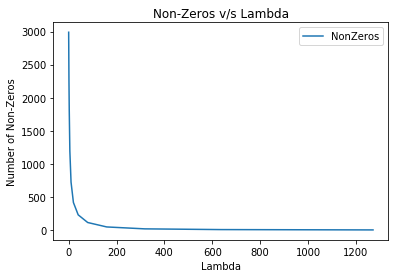

In [127]:
import matplotlib.pyplot as plt

plt.plot(lambas,w_non_zeros, label = "NonZeros")
plt.xlabel('Lambda')
plt.ylabel("Number of Non-Zeros")
plt.legend(loc="best")
plt.title('Non-Zeros v/s Lambda')
plt.show()

In [135]:
import pickle

f = open('w_final.pckl', 'wb')
pickle.dump(w_vecs[9], f)
f.close()

f1 = open('b_final.pckl', 'wb')
pickle.dump(b_vecs[9], f1)
f1.close()
